In [1]:
#wget http://irsa.ipac.caltech.edu/data/Planck/release_2/all-sky-maps/maps/LFI_SkyMap_070_1024_R2.01_full.fits

In [2]:
import healpy as hp

In [3]:
%matplotlib inline

In [4]:
m = hp.read_map("LFI_SkyMap_070_1024_R2.01_full.fits")

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


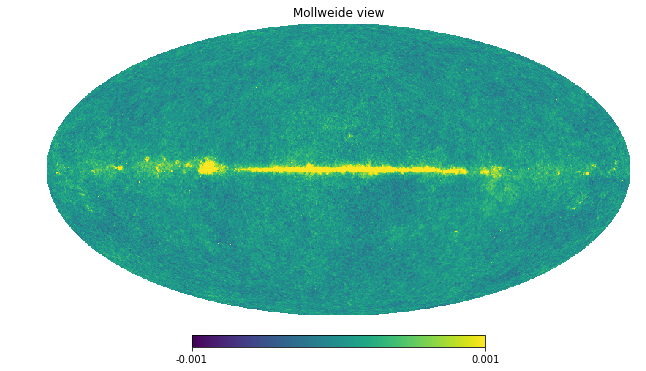

In [5]:
hp.mollview(m, min=-1e-3, max=1e-3)

In [6]:
import matplotlib.pyplot as plt

In [7]:
#import dipole

ImportError: No module named 'dipole'

In [ ]:
dip = dipole.solar_system_dipole_map(1024)

In [ ]:
hp.mollview(m+dip, min=-3e-3, max=3e-3, coord="GE")

In [ ]:
speed, theta, phi = dipole.wmap5_parameters()

In [ ]:
np.degrees([theta, phi])

In [ ]:
r = hp.Rotator(coord="GE")

In [9]:
import numpy as np

In [25]:
xsize = 360
ysize = xsize/2.
nside = 1024

theta = np.linspace(np.pi, 0, ysize)
phi   = np.linspace(-np.pi, np.pi, xsize)
longitude = np.radians(np.linspace(-180, 180, xsize))
latitude = np.radians(np.linspace(-90, 90, ysize))

# project the map to a rectangular matrix xsize x ysize
PHI, THETA = np.meshgrid(phi, theta)
grid_pix = hp.ang2pix(nside, THETA, PHI)


/home/zonca/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/home/zonca/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [26]:
grid_map = (m)[grid_pix]

In [27]:
#longitude = longitude[::-1]

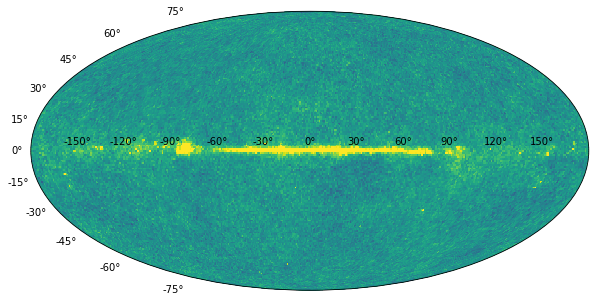

In [29]:
fig = plt.figure(figsize=(10,20))

fig.add_subplot(111, projection="mollweide")
vmax=1e-3
vmin = -1e-3
plt.pcolormesh(longitude[::-1], latitude, grid_map,vmin=vmin, vmax=vmax,  );

In [22]:
grid_map[:3,:2]

NameError: name 'grid_map' is not defined

In [23]:
grid_map.max()

NameError: name 'grid_map' is not defined

In [24]:
grid_map.min()

NameError: name 'grid_map' is not defined

In [25]:
plt.imshow(grid_map, vmin=-3e-3, vmax=3e-3)

NameError: name 'plt' is not defined

In [30]:
import pandas as pd

/home/zonca/anaconda/lib/python3.5/site-packages/numexpr/cpuinfo.py:42: UserWarning: [Errno 12] Cannot allocate memory
  warnings.warn(str(e), UserWarning, stacklevel=stacklevel)


In [31]:
long_lat_index = pd.MultiIndex.from_product(
    [np.degrees(a).round().astype(np.int) for a in [latitude, longitude]], names=["latitude","longitude"])

In [32]:
map_series = pd.Series(grid_map.flatten(), index=long_lat_index)

In [33]:
map_series.head()

latitude  longitude
-90       -180         0.000063
          -179         0.000063
          -178         0.000063
          -177         0.000063
          -176         0.000063
dtype: float64

In [34]:
square = map_series.unstack().values

In [35]:
square.shape

(180, 360)

In [36]:
grid_map.shape

(180, 360)

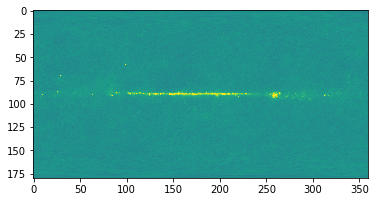

In [37]:
plt.imshow(grid_map, vmin=-3e-3, vmax=3e-3)

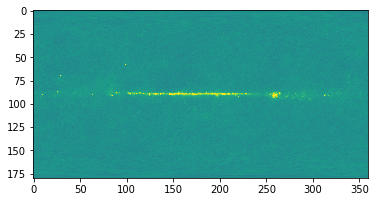

In [38]:
plt.imshow(square, vmin=-3e-3, vmax=3e-3)

In [39]:
map_series.name = "temperature"

In [40]:
map_series.to_hdf("planck_70GHz_map.hdf5", "temperature")

In [31]:
hp.mollview?

In [36]:
hp.vec2dir??

In [44]:
hp.nside2npix(64)

49152

In [45]:
180*360

64800

In [48]:
hp.dir2vec??